In [1]:
def reconstr_loss(original_spectra, reconstructed_spectra, latent_dim):
    '''Function to calculate reconstruction loss.

    Inputs:
    - original_spectra (np.array): original spectra.
    - reconstructed_spectra (np.array): reconstruction of the original spectra from the latent representation.
    - latent_dim (integer): size of the latent space.

    Returns:
    - reconstruction loss with added penalty for the latent space size
    '''

    penalty = 0.00003
    penalty2 = 5*0.00003


    mse_loss = mean_squared_error(original_spectra, reconstructed_spectra, squared=True)
    loss_penalized = mse_loss + latent_dim*penalty + penalty2*(latent_dim > 6)

    return(loss_penalized)

In [7]:
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import h5py
import gdown
from collections import defaultdict
import matplotlib.pyplot as plt

In [8]:
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import models 
from tensorflow.keras import layers 
from tensorflow.keras import initializers
from tensorflow.keras.models import load_model
#
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
# 
from collections import defaultdict

In [ ]:
# url_train = 'https://drive.google.com/u/0/uc?export=download&confirm=F_-k&id=1sdx-m9PLLKjPQ8J2g7H2zw2FUSMV6jYz'
# url_val = 'https://drive.google.com/u/0/uc?export=download&confirm=QL45&id=1qymhB00l4wy_Ql4A3DRxguxytFzda7_0'
# url_test = 'https://drive.google.com/u/0/uc?export=download&confirm=nAB1&id=1lhJl_6lWCxNpOSxJd9_d_qssgUKEli7M'

# # Using this links may be faster (but can fail if many users are connected)
# # url_train = 'https://drive.google.com/uc?id=1sdx-m9PLLKjPQ8J2g7H2zw2FUSMV6jYz'
# # url_val = 'https://drive.google.com/uc?id=1qymhB00l4wy_Ql4A3DRxguxytFzda7_0'
# # url_test = 'https://drive.google.com/uc?id=1lhJl_6lWCxNpOSxJd9_d_qssgUKEli7M'


# train_set = gdown.download(url_train, 'train_set.hdf5', quiet=False)
# val_set = gdown.download(url_val, 'val_set.hdf5', quiet=False)
# test_set = gdown.download(url_test, 'test_set.hdf5', quiet=False)


In [3]:
data_train = h5py.File( 'train_set.hdf5', 'r')
x_train = np.array( data_train['spectra'] )

data_val = h5py.File( 'val_set.hdf5', 'r')
x_val = np.array( data_val['spectra'] )

data_test = h5py.File('test_set.hdf5', 'r')
x_test = np.array( data_test['spectra'] )

In [4]:
print("Train size:", x_train.shape)
print("Val size:", x_val.shape)
print("Test size:", x_test.shape)
# print(np.max(x_train))
# print(np.min(x_train))
# print(np.max(x_val))
# print(np.min(x_val))
# print(np.max(x_test))
# print(np.min(x_test))


Train size: (6500, 39974)
Val size: (1000, 39974)
Test size: (500, 39974)


In [ ]:
samplei = 0 
plt.plot(x_train[samplei, :])

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [13]:
Scaling_dict = {'none':[],'MinMaxScaler': MinMaxScaler, 'StandardScaler':StandardScaler, 'MaxAbsScaler':MaxAbsScaler, 'RobustScaler': RobustScaler,
               }

In [ ]:
# processing the data 
# scale the data 

# define data
scaler = MinMaxScaler()
# transform data
x_trained_scaled = scaler.fit_transform(x_train)

StandardScaler
print(np.max(x_trained_scaled))
print(np.min(x_trained_scaled))
# scale validation and test to. Only transform. 
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


In [9]:
# define an auto encoder, the hiper parameters are 
# number of hidden layers in the encoding, 
# number of units in the encoding 
# Other things we could change in the learning rate and the activation functions 
input_dim = x_train.shape[1]
def make_encoder(hidden_nodes_list, activation_functions_list):

    if len(hidden_nodes_list)!= len(activation_functions_list):
        raise ValueError("length of hidden nodes list should be equal length of activation_functions_list")

    nLayers = len(hidden_nodes_list)
    encoder = models.Sequential()
    for i in range(nLayers): 

        act = activation_functions_list[i]
        n_nodes = hidden_nodes_list[i]
        if i==0:
            encoder.add(layers.Dense(n_nodes,activation=act, input_shape=(input_dim,)))
        else: 
            encoder.add(layers.Dense(n_nodes,activation=act))

        latent_dim = hidden_nodes_list[-1]
    return encoder , latent_dim

def make_decoder(hidden_nodes_list, activation_functions_list, latent_dim):
    if len(hidden_nodes_list)!= len(activation_functions_list):
        raise ValueError("length of hidden nodes list should be equal length of activation_functions_list")
    nLayers = len(hidden_nodes_list)
    decoder = models.Sequential()
    for i in range(nLayers): 

        act = activation_functions_list[i]
        n_nodes = hidden_nodes_list[i]
        if i==0:
            decoder.add(layers.Dense(n_nodes, activation=act, input_shape=(latent_dim,)))
        else: 
            decoder.add(layers.Dense(n_nodes,activation=act))
    return decoder 





none


2021-11-28 06:29:06.248034: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-28 06:29:06.248083: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-28 06:29:06.248114: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c0704a-s11.ufhpc): /proc/driver/nvidia/version does not exist
2021-11-28 06:29:06.248340: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-28 06:29:07.799052: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:1

Epoch 1/100
51/51 [==============================] - 5s 97ms/step - loss: 0.6560 - mse: 0.6560 - val_loss: 0.2897 - val_mse: 0.2897
Epoch 2/100
51/51 [==============================] - 4s 88ms/step - loss: 0.2723 - mse: 0.2723 - val_loss: 0.2662 - val_mse: 0.2662
Epoch 3/100
51/51 [==============================] - 5s 93ms/step - loss: 0.2661 - mse: 0.2661 - val_loss: 0.2661 - val_mse: 0.2661
Epoch 4/100
51/51 [==============================] - 5s 93ms/step - loss: 0.2660 - mse: 0.2660 - val_loss: 0.2661 - val_mse: 0.2661
Epoch 5/100
51/51 [==============================] - 5s 92ms/step - loss: 0.2673 - mse: 0.2673 - val_loss: 0.2668 - val_mse: 0.2668
Epoch 6/100
51/51 [==============================] - 5s 96ms/step - loss: 0.2608 - mse: 0.2608 - val_loss: 0.2576 - val_mse: 0.2576
Epoch 7/100
51/51 [==============================] - 5s 93ms/step - loss: 0.2574 - mse: 0.2574 - val_loss: 0.2573 - val_mse: 0.2573
Epoch 8/100
51/51 [==============================] - 5s 95ms/step - loss: 0.

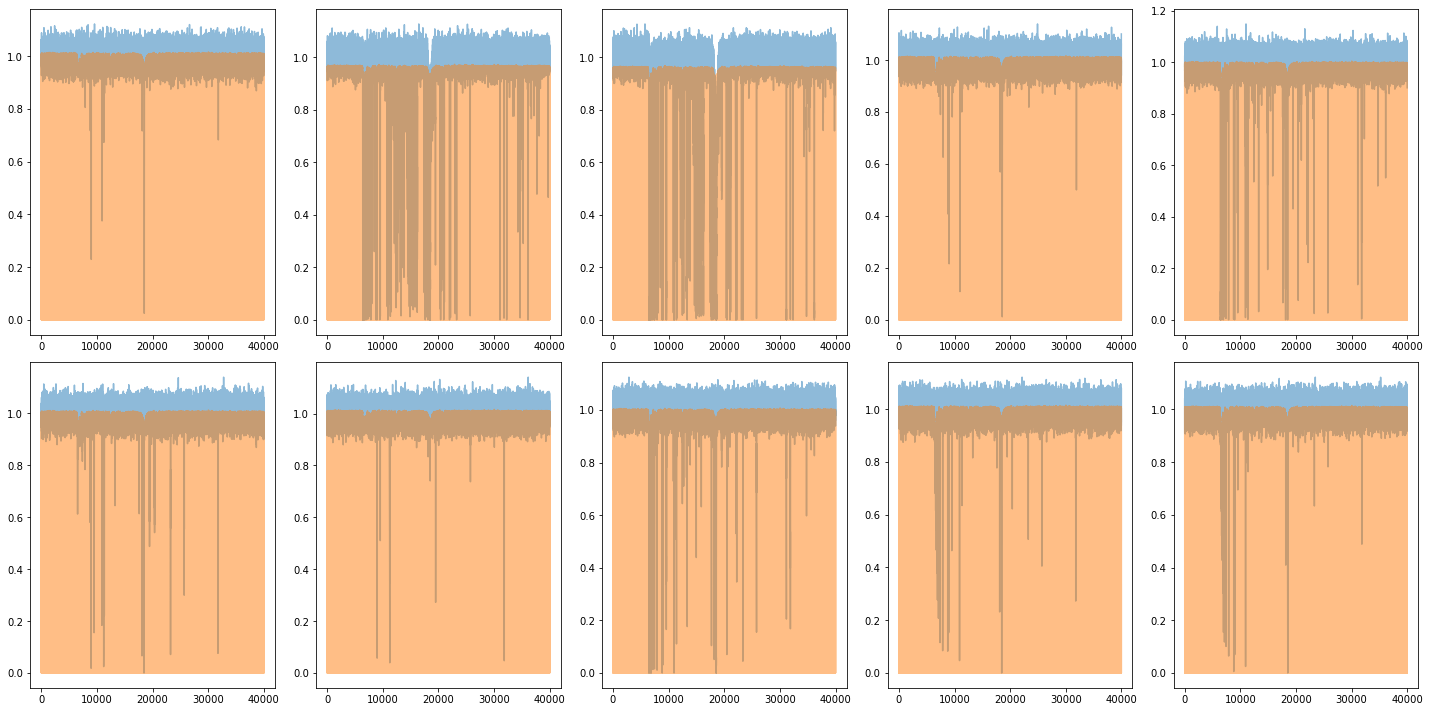

0.27764315578948606

MinMaxScaler
Epoch 1/100
51/51 [==============================] - 5s 95ms/step - loss: 0.4171 - mse: 0.4171 - val_loss: 0.2855 - val_mse: 0.2855
Epoch 2/100
51/51 [==============================] - 5s 92ms/step - loss: 0.1157 - mse: 0.1157 - val_loss: 0.0993 - val_mse: 0.0993
Epoch 3/100
51/51 [==============================] - 5s 89ms/step - loss: 0.0988 - mse: 0.0988 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 4/100
51/51 [==============================] - 5s 93ms/step - loss: 0.0986 - mse: 0.0986 - val_loss: 0.0987 - val_mse: 0.0987
Epoch 5/100
51/51 [==============================] - 5s 95ms/step - loss: 0.0985 - mse: 0.0985 - val_loss: 0.0996 - val_mse: 0.0996
Epoch 6/100
51/51 [==============================] - 5s 97ms/step - loss: 0.0976 - mse: 0.0976 - val_loss: 0.0970 - val_mse: 0.0970
Epoch 7/100
51/51 [==============================] - 5s 95ms/step - loss: 0.0964 - mse: 0.0964 - val_loss: 0.0959 - val_mse: 0.0959
Epoch 8/100
51/51 [=======================

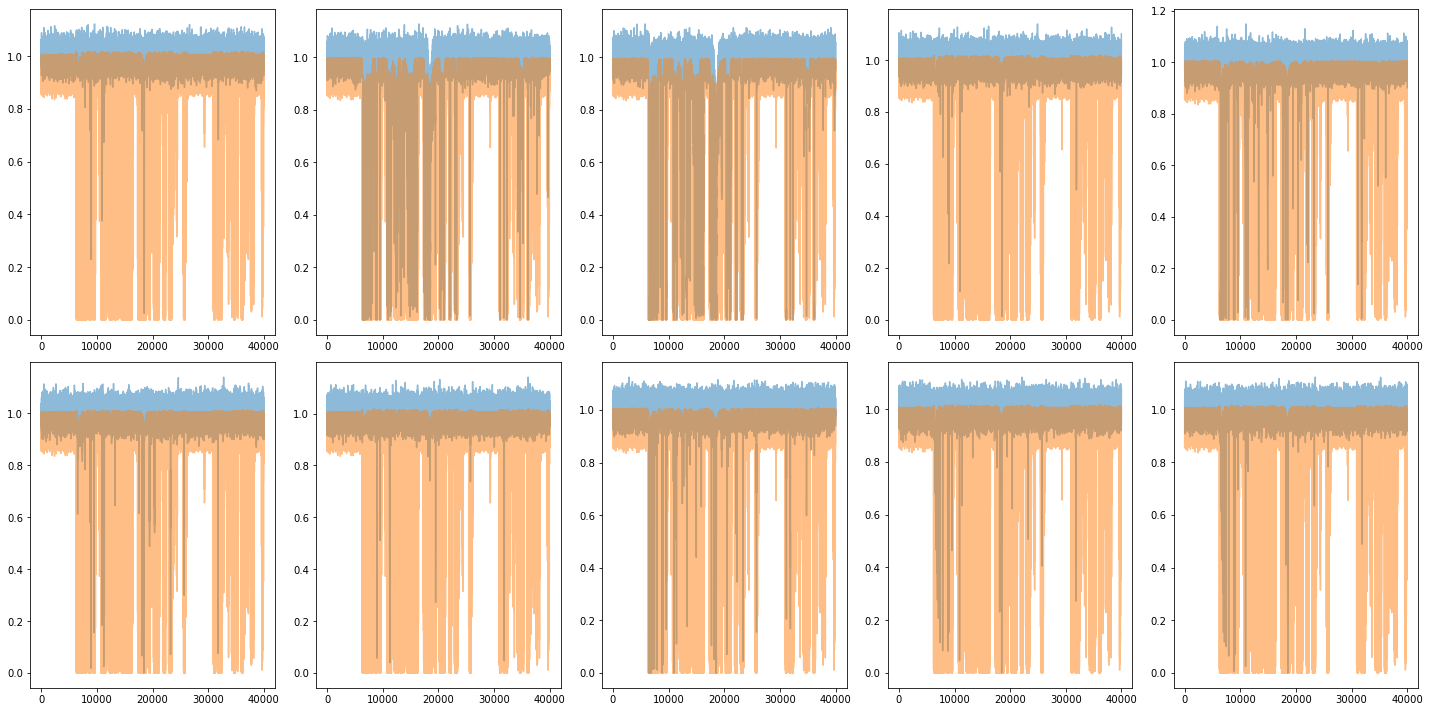

0.07323155968656173

StandardScaler
Epoch 1/100
51/51 [==============================] - 5s 97ms/step - loss: 0.9970 - mse: 0.9970 - val_loss: 1.0227 - val_mse: 1.0227
Epoch 2/100
51/51 [==============================] - 5s 97ms/step - loss: 0.9916 - mse: 0.9916 - val_loss: 1.0201 - val_mse: 1.0201
Epoch 3/100
51/51 [==============================] - 5s 92ms/step - loss: 0.9900 - mse: 0.9900 - val_loss: 1.0194 - val_mse: 1.0194
Epoch 4/100
51/51 [==============================] - 5s 92ms/step - loss: 0.9894 - mse: 0.9894 - val_loss: 1.0192 - val_mse: 1.0192
Epoch 5/100
51/51 [==============================] - 5s 92ms/step - loss: 0.9891 - mse: 0.9891 - val_loss: 1.0190 - val_mse: 1.0190
Epoch 6/100
51/51 [==============================] - 5s 95ms/step - loss: 0.9888 - mse: 0.9888 - val_loss: 1.0189 - val_mse: 1.0189
Epoch 7/100
51/51 [==============================] - 5s 94ms/step - loss: 0.9885 - mse: 0.9885 - val_loss: 1.0187 - val_mse: 1.0187
Epoch 8/100
51/51 [=====================

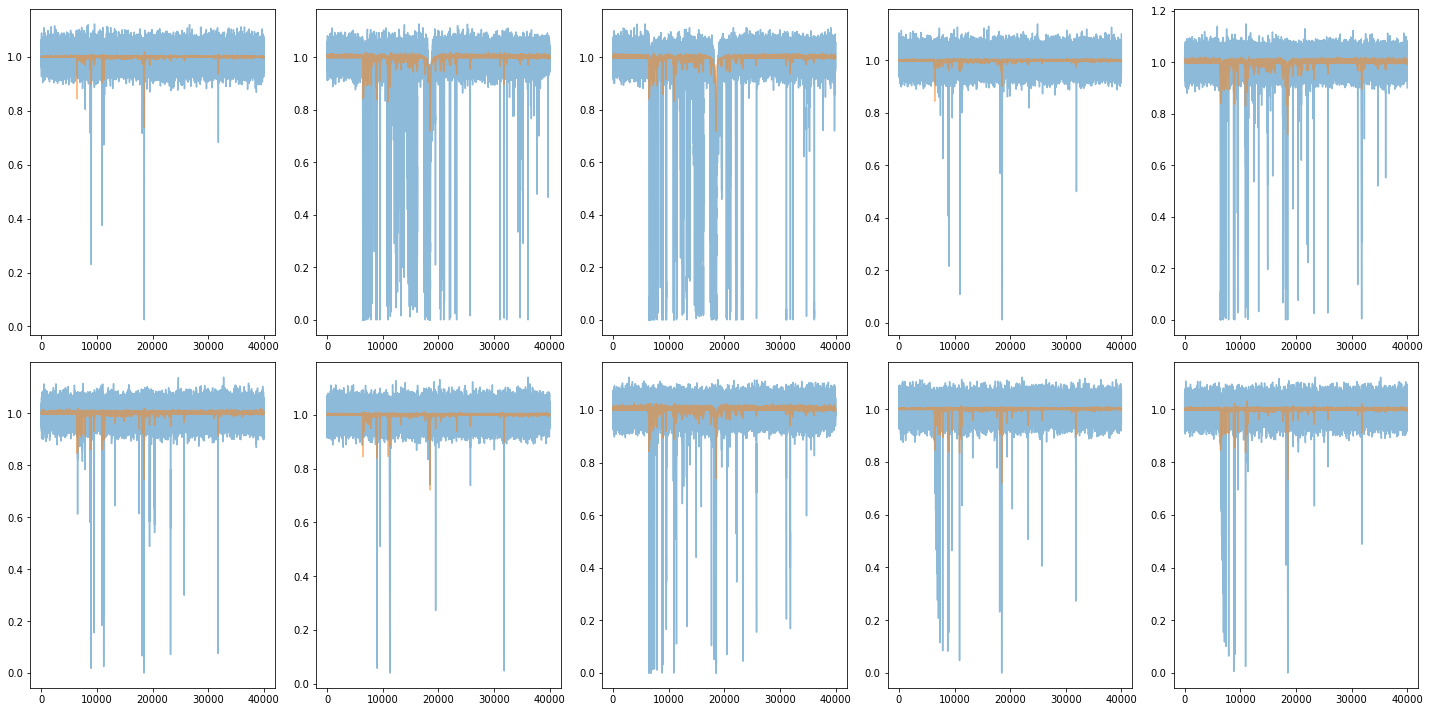

0.005976341289153798

MaxAbsScaler
Epoch 1/100
51/51 [==============================] - 5s 99ms/step - loss: 0.4107 - mse: 0.4107 - val_loss: 0.2387 - val_mse: 0.2387
Epoch 2/100
51/51 [==============================] - 5s 93ms/step - loss: 0.1409 - mse: 0.1409 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 3/100
51/51 [==============================] - 5s 93ms/step - loss: 0.1237 - mse: 0.1237 - val_loss: 0.1237 - val_mse: 0.1237
Epoch 4/100
51/51 [==============================] - 5s 89ms/step - loss: 0.1236 - mse: 0.1236 - val_loss: 0.1237 - val_mse: 0.1237
Epoch 5/100
51/51 [==============================] - 5s 95ms/step - loss: 0.1233 - mse: 0.1233 - val_loss: 0.1219 - val_mse: 0.1219
Epoch 6/100
51/51 [==============================] - 5s 97ms/step - loss: 0.1214 - mse: 0.1214 - val_loss: 0.1212 - val_mse: 0.1212
Epoch 7/100
51/51 [==============================] - 5s 95ms/step - loss: 0.1208 - mse: 0.1208 - val_loss: 0.1201 - val_mse: 0.1201
Epoch 8/100
51/51 [======================

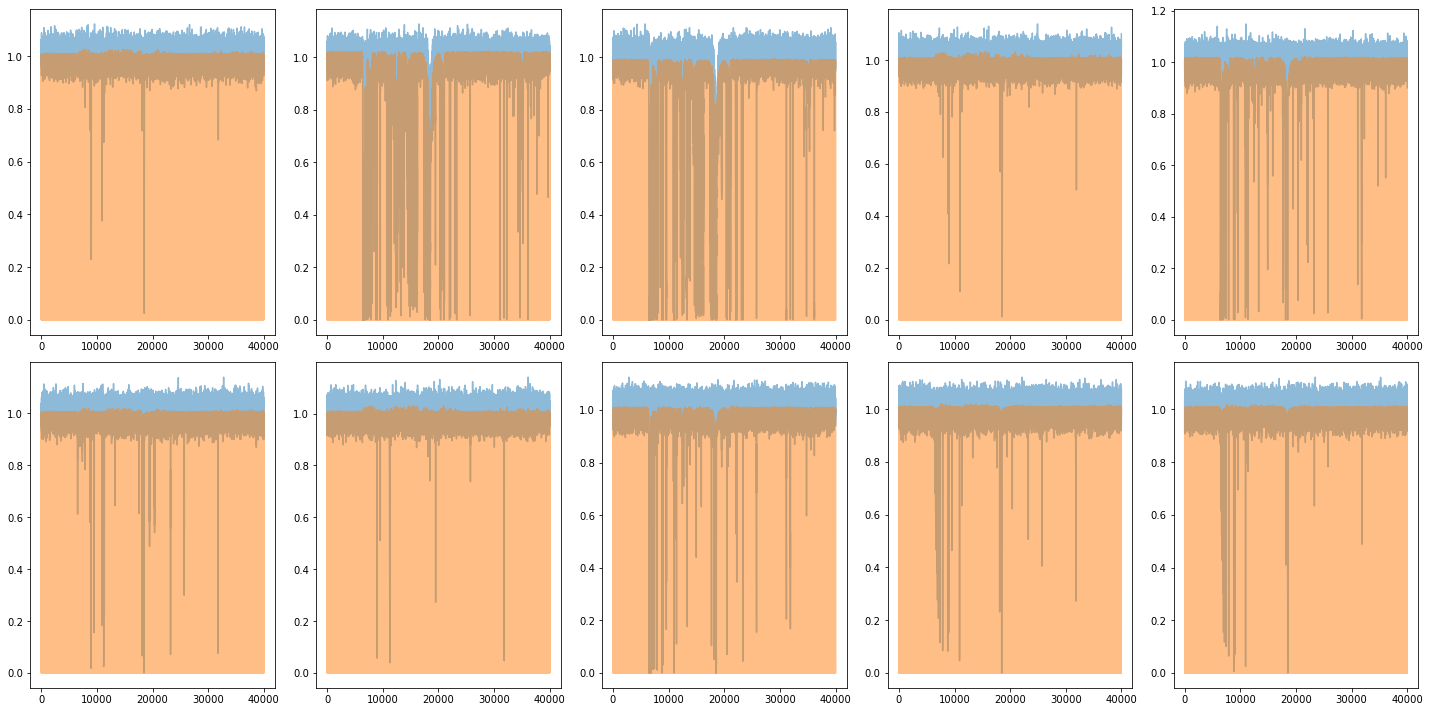

0.07737754859797331

RobustScaler
Epoch 1/100
51/51 [==============================] - 5s 100ms/step - loss: 2.6296 - mse: 2.6296 - val_loss: 2.7929 - val_mse: 2.7929
Epoch 2/100
51/51 [==============================] - 5s 101ms/step - loss: 2.6239 - mse: 2.6239 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 3/100
51/51 [==============================] - 5s 89ms/step - loss: 2.6238 - mse: 2.6238 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 4/100
51/51 [==============================] - 4s 88ms/step - loss: 2.6238 - mse: 2.6238 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 5/100
51/51 [==============================] - 5s 89ms/step - loss: 2.6238 - mse: 2.6238 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 6/100
51/51 [==============================] - 5s 90ms/step - loss: 2.6238 - mse: 2.6238 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 7/100
51/51 [==============================] - 5s 93ms/step - loss: 2.6238 - mse: 2.6238 - val_loss: 2.7928 - val_mse: 2.7928
Epoch 8/100
51/51 [=====================

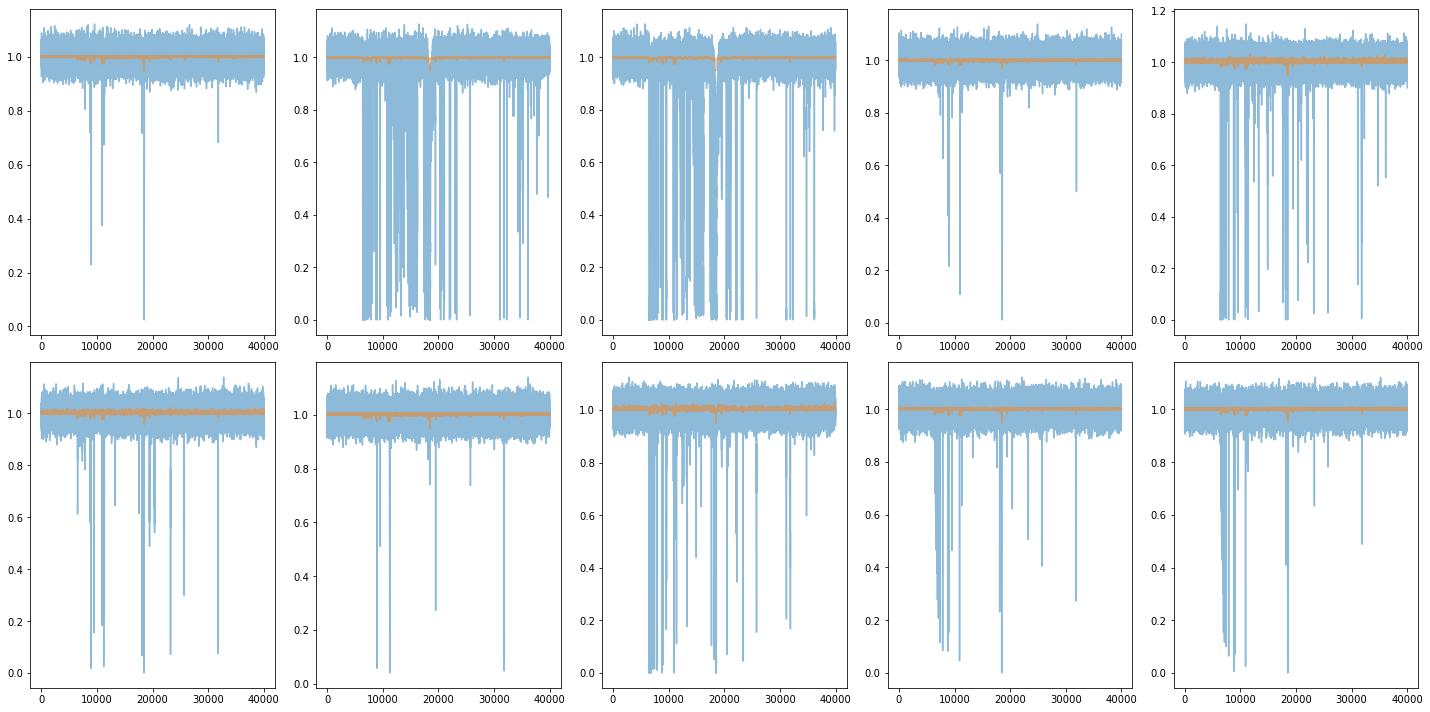

0.006847655581970568



In [14]:

results_dict = defaultdict(lambda:'not present ')


hidden_nodes = [264,128,6]
hidden_nodes_dec = [128,264,input_dim]

activation_e1= [ 'linear','relu','linear']#,'tanh','tanh','tanh']

activation_d1= [ 'relu','relu','relu']#,'tanh','tanh','tanh']

earlystopping = EarlyStopping(monitor = 'val_loss', patience = 10)
epochs = 100 
batch_size = 128

import os
foldername = 'ae_mlp'
for key in Scaling_dict: 
    print(key)
    if os.path.isdir(foldername) == False:
        os.mkdir('ae_mlp')
    filepath = f'{foldername}/Model_{key}.h5'
    if key =='none':
        x_trained_scaled = x_train.copy()
        x_val_scaled = x_val.copy()
        x_test_scaled = x_test.copy()
        
    else: 
    
        Scaler = Scaling_dict[key]()
        #scale data 
        x_trained_scaled = Scaler.fit_transform(x_train)
        # scale validation and test to. Only transform. 
        x_val_scaled = Scaler.transform(x_val)
        x_test_scaled = Scaler.transform(x_test)
    # make network again
    encoder,ld = make_encoder(hidden_nodes, activation_e1)
    decoder = make_decoder(hidden_nodes_dec,activation_d1, latent_dim = ld)
    network=models.Sequential()
    network.add(encoder)
    network.add(decoder)
    network.compile(optimizer='adam', loss='mse', metrics=['mse'])
    ### train the network 
    history = network.fit(x_trained_scaled,x_trained_scaled,
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[earlystopping], # Early stopping
                      validation_data=(x_val_scaled,x_val_scaled))
    network.save(filepath)
    results_dict[key + 'his'] = history
    ## check reconstruction loss 
    test_set_latent_encoding = encoder(x_test_scaled)
    test_set_reconstructions = decoder(test_set_latent_encoding)
    # 
    if key=='none':
        x_test_reconstructed = test_set_reconstructions
    else:
        x_test_reconstructed = Scaler.inverse_transform(test_set_reconstructions)
    rl = reconstr_loss(x_test, x_test_reconstructed, latent_dim = test_set_latent_encoding.shape[1])
    results_dict[key+'_reconloss'] = rl
    nr = 2; nc = 5
    fig, axs = plt.subplots(nr,nc, figsize = (20,10))
    ir = 0; ic = 0
    for i in range(10):
        axs[ir,ic].plot(x_test[i,:], label = 'data', alpha = .5)
        axs[ir,ic].plot(x_test_reconstructed[i,:], label = 'recon',  alpha = .5)
        ic +=1 
        if ic == nc:
            ic=0
            ir+=1 
    plt.tight_layout()
    plt.show()
    print(rl)
    print()

In [16]:
results_dict

defaultdict(<function __main__.<lambda>()>,
            {'nonehis': <keras.callbacks.History at 0x2b6113e62970>,
             'none_reconloss': 0.27764315578948606,
             'MinMaxScalerhis': <keras.callbacks.History at 0x2b6107b9d460>,
             'MinMaxScaler_reconloss': 0.07323155968656173,
             'StandardScalerhis': <keras.callbacks.History at 0x2b610c0fa520>,
             'StandardScaler_reconloss': 0.005976341289153798,
             'MaxAbsScalerhis': <keras.callbacks.History at 0x2b610c0323d0>,
             'MaxAbsScaler_reconloss': 0.07737754859797331,
             'RobustScalerhis': <keras.callbacks.History at 0x2b610beccd60>,
             'RobustScaler_reconloss': 0.006847655581970568})

In [ ]:
plt.plot(history.history['val_loss'][:-5])
plt.plot(history.history['loss'][:-5])

In [16]:
reduce_dimensionality = encoder
calculate_reconstructions = decoder

In [21]:
test_set_latent_encoding = encoder(x_test_scaled)
test_set_reconstructions = decoder(test_set_latent_encoding)
# 
x_test_reconstructed = Scaler.inverse_transform(test_set_reconstructions)
rl = reconstr_loss(x_test, x_test_reconstructed, latent_dim = test_set_latent_encoding.shape[1])

In [22]:
rl

0.006846637817784576

In [ ]:
reduce_dimensionality = e1
calculate_reconstructions = dec1

In [15]:
np.max(x_trained_scaled)

4.068164804268903

In [ ]:
test_set_latent_encoding

In [ ]:

for i in range(10):
    plt.plot(x_test[i,:], label = 'data')
    plt.plot(test_set_reconstructions[i,:], label = 'recon')
    plt.show()